In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from random import random

In [5]:
# Primero cargar el archivo en la pestaña Archivos, en la barra lateral izquierda
df=pd.read_excel('informacion_compra.xlsx')
df.rename(columns={' Unidades ': 'Unidades'}, inplace=True)
print(df.columns)
df.head()

Index(['Producto', 'Unidades', 'Factura'], dtype='object')


,Producto,Unidades,Factura
0,48443,1,799186
1,42877,1,717106
2,48296,1,468125
3,34704,1,176490
4,47158,2,674550


### 1. Distribución de probabilidad del número de unidades que demanda un cliente.



In [6]:
# Dataframe con cantidad de veces que se pidieron n productos por un mismo cliente
df_sum = df.groupby('Factura')['Unidades'].sum()
df_sum.value_counts().index

cp = df.Unidades.value_counts().index
f = df.Unidades.value_counts().to_list()
fr = [x/df.Unidades.value_counts().sum() for x in df.Unidades.value_counts().to_list()]

df_nProd = pd.DataFrame({
    'Cant_productos':   cp,
    'Frecuencia':       f,
    'Frec_relativa':    fr
    })
# Orden ascendente
df_nProd = df_nProd.sort_values(by='Frec_relativa', ascending=True)
df_nProd.index=range(len(df_nProd))


# Frecuencia acumulada
fa = [sum(df_nProd.Frec_relativa[:x+1]) for x in range(len(fr))]
df_nProd['Frec_acumulada'] = fa
# Límite inferior de intervalo de probabilidad
df_nProd['Lim_inf'] = [0] + [fa[x-1] for x in range(1, len(fa))]
# Límite superior de intervalo de probabilidad
df_nProd['Lim_sup'] = fa

df_nProd

,Cant_productos,Frecuencia,Frec_relativa,Frec_acumulada,Lim_inf,Lim_sup
0,12,1,0.000032,0.000032,0.000000,0.000032
1,15,1,0.000032,0.000063,0.000032,0.000063
2,18,1,0.000032,0.000095,0.000063,0.000095
3,9,3,0.000095,0.000190,0.000095,0.000190
4,16,3,0.000095,0.000284,0.000190,0.000284
5,8,5,0.000158,0.000442,0.000284,0.000442
6,20,6,0.000190,0.000632,0.000442,0.000632
7,7,6,0.000190,0.000821,0.000632,0.000821
8,5,31,0.000979,0.001801,0.000821,0.001801
9,10,34,0.001074,0.002875,0.001801,0.002875


In [7]:
df_nProd.describe()

,Cant_productos,Frecuencia,Frec_relativa,Frec_acumulada,Lim_inf,Lim_sup
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,9.066667,2110.266667,0.066667,0.073396,0.006729,0.073396
std,5.981718,7624.164333,0.240859,0.256856,0.016413,0.256856
min,1.000000,1.000000,0.000032,0.000032,0.000000,0.000032
25%,4.500000,3.000000,0.000095,0.000237,0.000142,0.000237
50%,8.000000,6.000000,0.000190,0.000821,0.000632,0.000821
75%,13.500000,107.500000,0.003396,0.006919,0.003522,0.006919
max,20.000000,29635.000000,0.936217,1.000000,0.063783,1.000000


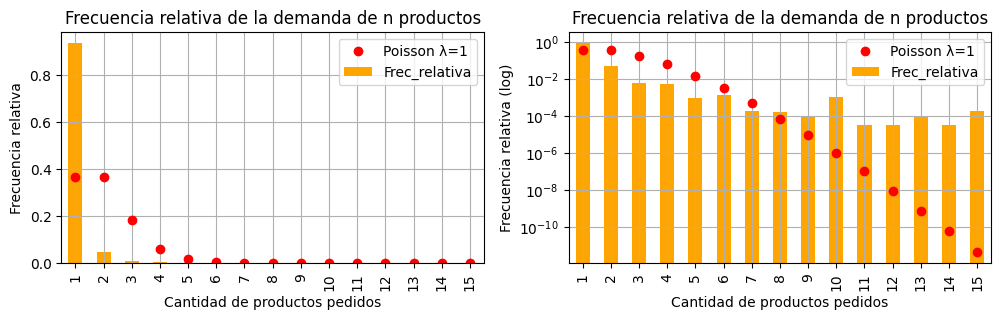

In [8]:
plt.subplots(1, 2, figsize=(12, 3))

plt.subplot(1, 2, 1)
df_nProd.sort_values(by='Cant_productos').Frec_relativa.plot.bar(color='orange')
plt.title('Frecuencia relativa de la demanda de n productos')
plt.xlabel('Cantidad de productos pedidos')
plt.ylabel('Frecuencia relativa')
plt.grid()
plt.xticks(range(0, 15), range(1, 16))


# Distribución de Poisson
x = np.arange(0, 15)
y = poisson.pmf(x, mu=1)
plt.plot(x, y, 'ro', label='Poisson λ=1')
plt.legend(loc='best')
#plt.yscale("log")




plt.subplot(1, 2, 2)
df_nProd.sort_values(by='Cant_productos').Frec_relativa.plot.bar(color='orange')
plt.title('Frecuencia relativa de la demanda de n productos')
plt.xlabel('Cantidad de productos pedidos')
plt.ylabel('Frecuencia relativa (log)')
plt.grid()
plt.xticks(range(0, 15), range(1, 16))


# Distribución de Poisson
x = np.arange(0, 15)
y = poisson.pmf(x, mu=1)
plt.plot(x, y, 'ro', label='Poisson λ=1')
plt.legend(loc='best')
plt.yscale("log")
plt.show()

### 2. Distribución de probabilidad de demanda de los productos.




In [9]:
productsId = df.Producto.unique()

frecuency = []
for p in productsId:
  frecuency.append(df[df.Producto==p].Unidades.sum())    # Filter the dataframe by product Id

In [10]:
df_Prod = pd.DataFrame({
    'Id_producto': productsId,
    'Frecuencia': frecuency,
    'Frec_relativa': [x/sum(frecuency) for x in frecuency]
})

# Orden ascendente
df_Prod = df_Prod.sort_values(by='Frec_relativa', ascending=True)
df_Prod.index=range(len(df_Prod))

# Frecuencia acumulada
fa2 = [sum(df_Prod.Frec_relativa[:x+1]) for x in range(len(frecuency))]
df_Prod['Frec_acumulada'] = fa2
# Límite inferior de intervalo de probabilidad
df_Prod['Lim_inf'] = [0] + [fa2[x-1] for x in range(1, len(fa2))]
# Límite superior de intervalo de probabilidad
df_Prod['Lim_sup'] = fa2
df_Prod.tail(10)

,Id_producto,Frecuencia,Frec_relativa,Frec_acumulada,Lim_inf,Lim_sup
4751,34112,126,0.003598,0.948091,0.944494,0.948091
4752,47259,130,0.003712,0.951803,0.948091,0.951803
4753,24035,135,0.003855,0.955658,0.951803,0.955658
4754,47240,151,0.004311,0.959969,0.955658,0.959969
4755,34369,153,0.004369,0.964338,0.959969,0.964338
4756,34324,163,0.004654,0.968992,0.964338,0.968992
4757,17387,243,0.006938,0.975930,0.968992,0.975930
4758,34568,255,0.007281,0.983211,0.975930,0.983211
4759,24335,266,0.007595,0.990806,0.983211,0.990806
4760,34742,322,0.009194,1.000000,0.990806,1.000000


In [11]:
df_Prod.describe()

,Id_producto,Frecuencia,Frec_relativa,Frec_acumulada,Lim_inf,Lim_sup
count,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000
mean,27429.013233,7.356228,0.000210,0.157165,0.156955,0.157165
std,15038.019317,16.125739,0.000460,0.184672,0.184282,0.184672
min,23.000000,1.000000,0.000029,0.000029,0.000000,0.000029
25%,17238.000000,1.000000,0.000029,0.034006,0.033978,0.034006
50%,28005.000000,2.000000,0.000057,0.084773,0.084716,0.084773
75%,40445.000000,6.000000,0.000171,0.209834,0.209662,0.209834
max,53475.000000,322.000000,0.009194,1.000000,0.990806,1.000000


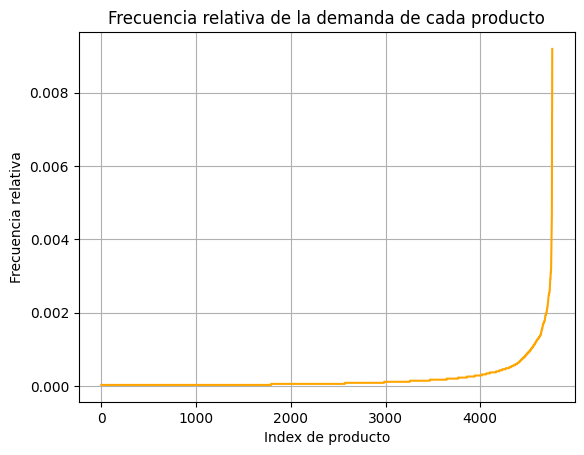

In [12]:
df_Prod.Frec_relativa.plot(color='orange')
plt.title('Frecuencia relativa de la demanda de cada producto')
plt.xlabel('Index de producto')
plt.ylabel('Frecuencia relativa')
#plt.xticks([])
plt.grid()
plt.show()

### 3. Funciónes para generar `cantidad de productos` y `Id de producto` siguiendo sus respectivas distribuciones de probabilidad.


**Función para obtener una cantidad de productos aleatoria siguiendo su distribución aleatoria**

In [13]:
df_nProd

,Cant_productos,Frecuencia,Frec_relativa,Frec_acumulada,Lim_inf,Lim_sup
0,12,1,0.000032,0.000032,0.000000,0.000032
1,15,1,0.000032,0.000063,0.000032,0.000063
2,18,1,0.000032,0.000095,0.000063,0.000095
3,9,3,0.000095,0.000190,0.000095,0.000190
4,16,3,0.000095,0.000284,0.000190,0.000284
5,8,5,0.000158,0.000442,0.000284,0.000442
6,20,6,0.000190,0.000632,0.000442,0.000632
7,7,6,0.000190,0.000821,0.000632,0.000821
8,5,31,0.000979,0.001801,0.000821,0.001801
9,10,34,0.001074,0.002875,0.001801,0.002875


In [14]:
def randnProd():
  # Random number between 0 and 15
  r = random()

  for i in range(len(df_nProd)):
    if((r >= df_nProd.iloc[i, 4]) and (r <= df_nProd.iloc[i, 5])):
      return df_nProd.iloc[i, 0]

randnProd()


1

**Función para obtener un Id de producto aleatorio siguiendo su distribución aleatoria**

In [15]:
def randIdProd():
  # Random number between 0 and 15
  r = random()

  for i in range(len(df_Prod)):
    if((r >= df_Prod.iloc[i, 4]) and (r <= df_Prod.iloc[i, 5])):
      return df_Prod.iloc[i, 0]

randIdProd()

2645

In [16]:
clientes=df.Factura.unique()

data = []

# Loop through the client IDs and apply the randProd function
for clientes in clientes:
    rand_product = randnProd()
    data.append({'Client_ID': clientes, 'Numero_de_Productos_Ordenados': rand_product})

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)






In [17]:
ids = []
for index, row in df.iterrows():
    print('index= ',index)
    rand_product_value = row['Numero_de_Productos_Ordenados']
    generated_ids = [randIdProd() for _ in range(rand_product_value)]
    print(generated_ids)

    ids.append(generated_ids)

# Add the generated IDs to a new 'ID' column in the dataframe
df['ID'] = ids

index=  0
[17207]
index=  1
[46277]
index=  2
[17197]
index=  3
[34560]
index=  4
[17385]
index=  5
[23292]
index=  6
[34534]
index=  7
[17154]
index=  8
[17696]
index=  9
[40681]
index=  10
[46008]
index=  11
[17717]
index=  12
[47052]
index=  13
[2465]
index=  14
[17395]
index=  15
[20361]
index=  16
[35096]
index=  17
[34299]
index=  18
[23259]
index=  19
[14511]
index=  20
[17233]
index=  21
[27071]
index=  22
[46288]
index=  23
[45544]
index=  24
[25011]
index=  25
[42629]
index=  26
[23669]
index=  27
[11737]
index=  28
[34560]
index=  29
[17165]
index=  30
[34116]
index=  31
[24335]
index=  32
[2346, 39482]
index=  33
[34355]
index=  34
[34742]
index=  35
[41647]
index=  36
[18368]
index=  37
[34742]
index=  38
[39960]
index=  39
[39574]
index=  40
[20750]
index=  41
[34058]
index=  42
[2489]
index=  43
[20673]
index=  44
[41461]
index=  45
[17183]
index=  46
[30222]
index=  47
[29876]
index=  48
[17101]
index=  49
[34552]
index=  50
[37749]
index=  51
[23343]
index=  52
[17387]

In [18]:
df5=df

In [19]:
productos=pd.read_csv('info_productos.csv')

In [20]:



output_lists = []

# Iterate through each row in df1
for index, row in df5.iterrows():
    id_list = row['ID']
    volume_list = []

    # Iterate through the IDs in the current row of df1
    for id_ in id_list:
        # Find the corresponding volume from df2
        matching_rows = productos[productos['Producto'] == id_]
        if not matching_rows.empty:
            volume = matching_rows[' Volumen mtro3'].values[0]
            volume_list.append(volume)
        else:
            volume_list.append(None)  # Or some default value for missing volumes

    output_lists.append(volume_list)


df5['Volume_List']=output_lists
df5['vol_total'] = df5['Volume_List'].apply(sum)

In [21]:
df5.rename(columns={'ID	': 'Lista_de_Productos_Ordenados'}, inplace=True)
df5.rename(columns={'Volume_List': 'Lista_de_Volumenes_de_Productos'}, inplace=True)
df5.rename(columns={'vol_total': 'Volumen_Total'}, inplace=True)
df5 = df5.drop(df5.columns[0], axis=1)


In [22]:
df5.head()

,Numero_de_Productos_Ordenados,ID,Lista_de_Volumenes_de_Productos,Volumen_Total
0,1,[17207],[0.67973333],0.679733
1,1,[46277],[0.00035347],0.000353
2,1,[17197],[0.007783],0.007783
3,1,[34560],[0.001617],0.001617
4,1,[17385],[0.00071],0.000710


In [23]:
df5.to_csv('opti_input_VRP.csv')